En este notebook realizaremos los ejercicios de python descritos a continuacion sobre los archivos csv 2015 y 2016 de informes de felicidad

SE PIDE:


Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:

Cargar los dos CSV como datasets.
Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?
Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.
Revisa el número de nulos que hay por cada columna, así como su porcentaje.
Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).
Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.
Obtén un resumen estadístico del dataframe sin valores nulos.
Muestra de forma gráfica la relación entre la familia y la salud.
Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
Muestra la matriz de correlación del daframe.
Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.
¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.
Muestra la distribución del grado de distopía en función de la región.

OBLIGATORIO: realizar la entrega desde un notebook en formato .ipynb.
OPCIONAL: de forma opcional, puede hacerse entrega del notebook como HTML.

In [3]:
# Cargo las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Cargar los dos CSV como datasets. Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [5]:
# Cargar los datasets
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')

# Mostrar las columnas de ambos datasets
columnas_2015 = df_2015.columns
columnas_2016 = df_2016.columns

# Imprimir las columnas de cada dataset
print("Columnas en 2015.csv:")
print(columnas_2015)
print("\nColumnas en 2016.csv:")
print(columnas_2016)

# Verificar diferencias entre las columnas
diferencias_columnas = set(columnas_2015).symmetric_difference(set(columnas_2016))
print("\nDiferencias entre las columnas de ambos datasets:")
print(diferencias_columnas)


Columnas en 2015.csv:
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Columnas en 2016.csv:
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Diferencias entre las columnas de ambos datasets:
{'Standard Error', 'Upper Confidence Interval', 'Lower Confidence Interval'}


Podemos observar que solo hay tres columnas diferentes, upper confidence interval y lower confidence interval que pertenecen a 2016.csv y standard error que pertenece a 2015.csv

2. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias. Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [8]:
# Unir los dos DataFrames ignorando diferencias en las columnas
df_union = pd.concat([df_2015, df_2016], ignore_index=True, sort=False)

# Contar el número de nulos por columna
nulos_por_columna = df_union.isnull().sum()

# Calcular el porcentaje de nulos por columna
porcentaje_nulos = (nulos_por_columna / len(df_union)) * 100

# Imprimir el número de nulos y su porcentaje por columna
for columna in nulos_por_columna.index:
    print(f"Columna: {columna}")
    print(f"Número de nulos: {nulos_por_columna[columna]}")
    print(f"Porcentaje de nulos: {porcentaje_nulos[columna]:.2f}%")
    print("-" * 30)

Columna: Country
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Region
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Happiness Rank
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Happiness Score
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Standard Error
Número de nulos: 157
Porcentaje de nulos: 49.84%
------------------------------
Columna: Economy (GDP per Capita)
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Family
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Health (Life Expectancy)
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Freedom
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------------------------
Columna: Trust (Government Corruption)
Número de nulos: 0
Porcentaje de nulos: 0.00%
------------

3. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo). Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [10]:
# Cambiar valores nulos en "Lower Confidence Interval" y "Upper Confidence Interval"
for columna in ['Lower Confidence Interval', 'Upper Confidence Interval']:
    if columna in df_union.columns:
        # Generar un número aleatorio entre el valor mínimo y máximo de la columna
        valor_aleatorio = np.random.uniform(df_union[columna].min(), df_union[columna].max())
        # Reemplazar valores nulos por este número aleatorio
        df_union[columna] = df_union[columna].fillna(valor_aleatorio)

# Cambiar valores nulos en "Standard Error" por su media al cuadrado
if 'Standard Error' in df_union.columns:
    media_standard_error = df_union['Standard Error'].mean()
    valor_reemplazo = media_standard_error ** 2
    df_union['Standard Error'] = df_union['Standard Error'].fillna(valor_reemplazo)

# Verificamos cambios realizados
print("Valores nulos después de los cambios:")
print(df_union.isnull().sum())

Valores nulos después de los cambios:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


4. Obtén un resumen estadístico del dataframe sin valores nulos.

Obtener un resumen estadístico del DataFrame sin valores nulos (ya sabemos que no tiene valores nulos por el apartado anterior pero aplicaremos la funcion .dropna() por requerimiento del ejercicio


In [13]:
print(df_union.dropna().describe())

       Happiness Rank  Happiness Score  Standard Error  \
count      315.000000       315.000000      315.000000   
mean        79.238095         5.378949        0.025161   
std         45.538922         1.141531        0.025851   
min          1.000000         2.839000        0.002293   
25%         40.000000         4.510000        0.002293   
50%         79.000000         5.286000        0.018480   
75%        118.500000         6.269000        0.043940   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                315.000000  315.000000                315.000000   
mean                   0.899837    0.892647                  0.594054   
std                    0.410780    0.286718                  0.240790   
min                    0.000000    0.000000                  0.000000   
25%                    0.594900    0.739880                  0.419645   
50%                    0.973060    0.93

5. Muestra de forma gráfica la relación entre la familia y la salud.

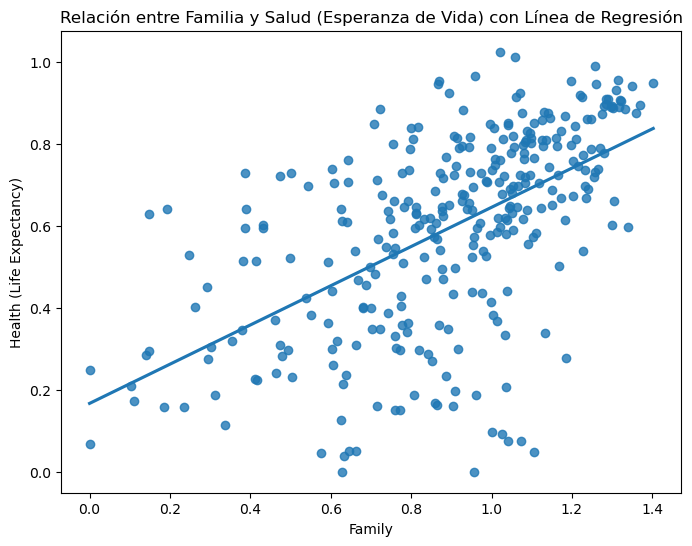

In [15]:
# Crear el gráfico de dispersión añadiendo recta de regresión para mayor valorvisual
plt.figure(figsize=(8, 6))
sns.regplot(x='Family', y='Health (Life Expectancy)', data=df_union, ci=None)

plt.title('Relación entre Familia y Salud (Esperanza de Vida) con Línea de Regresión')
plt.xlabel('Family')
plt.ylabel('Health (Life Expectancy)')

plt.show()

Podemos observar una tendencia  aunque no podemos decir que es significativa, actualmente podriamos decir que parece que ante mayor salud, mayor valor de familia, aunque no esta estrictamente correlacionado.

6. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno). 

De nuevo añadiremos una recta de regresion para ver la tendencia.

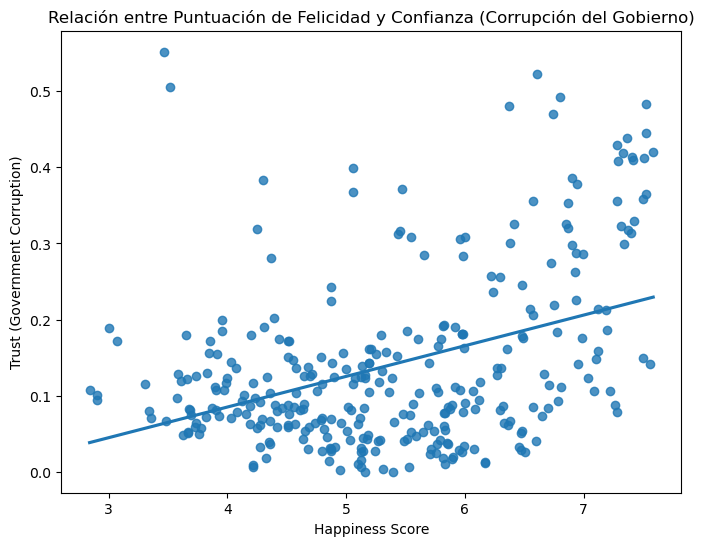

In [19]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='Happiness Score', y='Trust (Government Corruption)', data=df_union, ci=None)

plt.title('Relación entre Puntuación de Felicidad y Confianza (Corrupción del Gobierno)')
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')

plt.show()

En este caso no se observa una tendencia significativa entre la felicidad de las personas y su confianza en el gobierno de su pais

7. Muestra la matriz de correlación del dataframe.

Debemos primero filtrar el df para que no tenga columnas con valores no numericos, ya que la correlacion no podrá ser calculada sino.

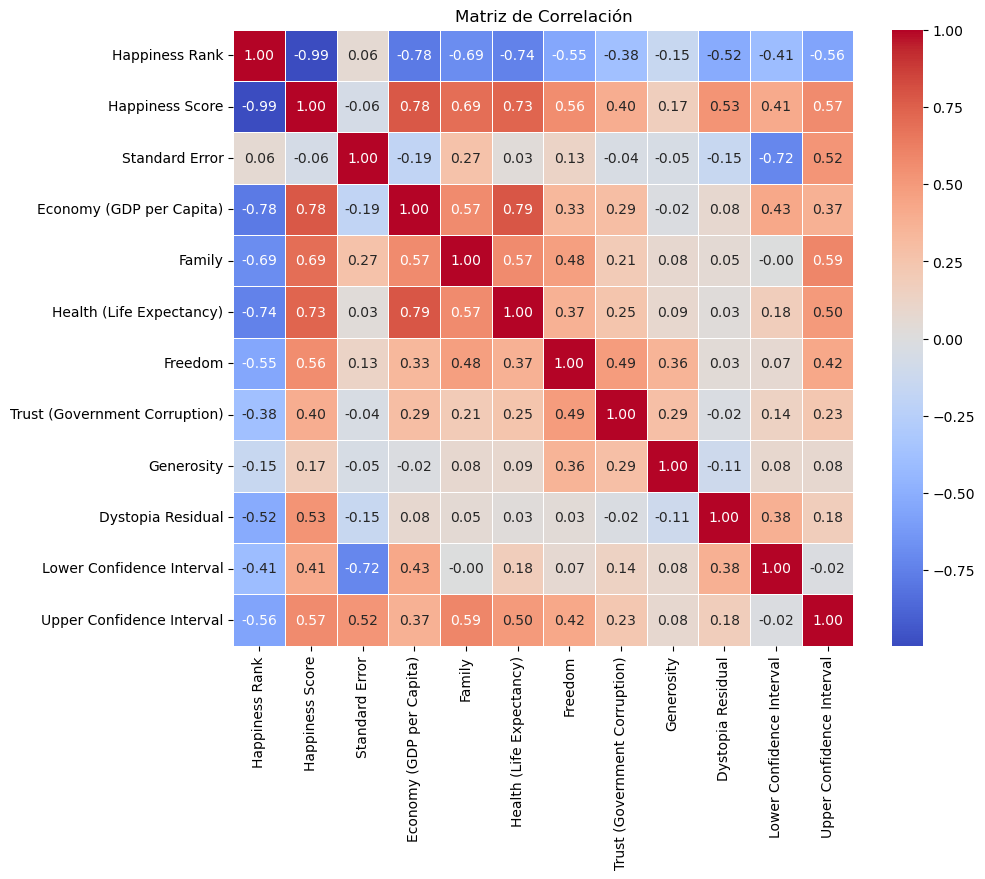

In [23]:
# Filtrar solo las columnas numéricas del DataFrame
df_numerico = df_union.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Mostrar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación')

plt.show()

Se observa que la mayor correlacion entre felicidad y economia lo que en cierto modo tiene lógica ya que ante mejor economia mas disponibilidad de tiempo, ademas de mejores servicios publicos lo que va relacionado tambien con la salud.

8. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

Entiendo de la pregunta que debo crear un nuevo df donde coja de cada pais repetido aquel valor que tuve la mayor felicidad

In [27]:
# Obtener los índices de las filas con el valor máximo de 'Happiness Score' para cada país
idx_max_felicidad = df_union.groupby('Country')['Happiness Score'].idxmax()

# Seleccionar las filas correspondientes al valor máximo de felicidad para cada país
df_agrupado_max_felicidad = df_union.loc[idx_max_felicidad].reset_index(drop=True)

# DataFrame resultante
print(df_agrupado_max_felicidad)

         Country                           Region  Happiness Rank  \
0    Afghanistan                    Southern Asia             153   
1        Albania       Central and Eastern Europe              95   
2        Algeria  Middle East and Northern Africa              38   
3         Angola               Sub-Saharan Africa             137   
4      Argentina      Latin America and Caribbean              26   
..           ...                              ...             ...   
159    Venezuela      Latin America and Caribbean              23   
160      Vietnam                Southeastern Asia              75   
161        Yemen  Middle East and Northern Africa             136   
162       Zambia               Sub-Saharan Africa              85   
163     Zimbabwe               Sub-Saharan Africa             115   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              3.575        0.030840                   0.31982  0.30285   
1              4.959 

9. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

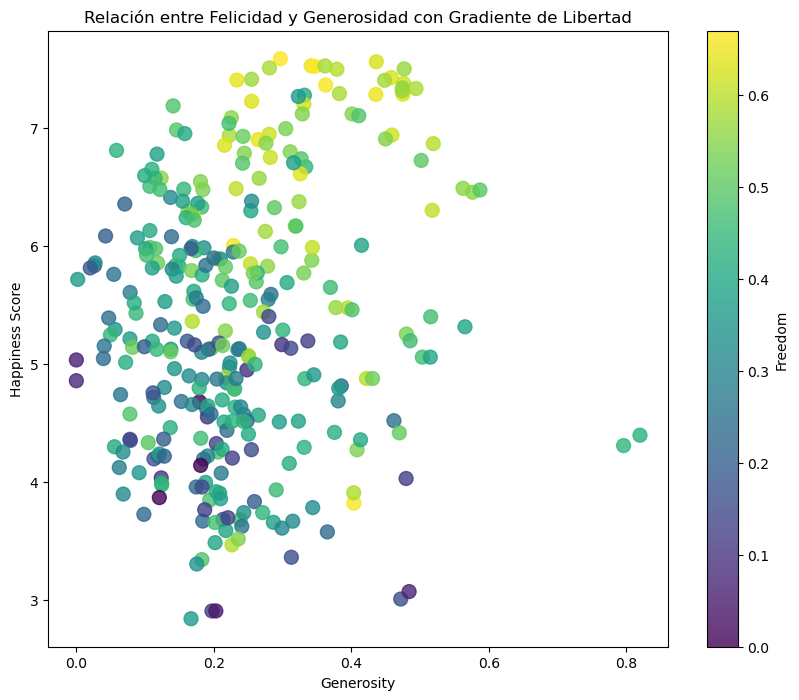

In [29]:
# Crear el gráfico de dispersión con gradiente de color en función de la libertad
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df_union['Generosity'], 
                      y=df_union['Happiness Score'], 
                      c=df_union['Freedom'], 
                      cmap='viridis', 
                      s=100, alpha=0.8)

# Añadir barra de color para el gradiente de libertad
cbar = plt.colorbar(scatter)
cbar.set_label('Freedom')

plt.title('Relación entre Felicidad y Generosidad con Gradiente de Libertad')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.show()

Se observa una relacion entre la felicidad y la libertad, no se observa una relacion clara con la generosidad. Ante valores altos de generosidad no se observa un aumento de la felicidad.

10. Muestra la distribución del grado de distopía en función de la región.

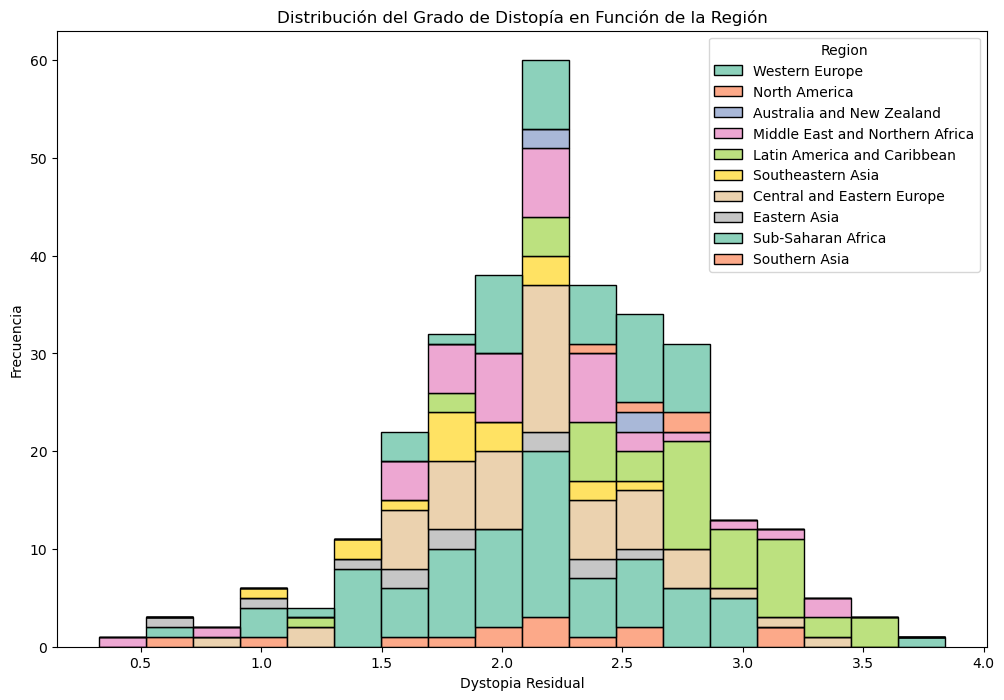

In [32]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el histograma de la distribución de 'Dystopia Residual' por 'Region'
sns.histplot(data=df_union, x='Dystopia Residual', hue='Region', multiple='stack', kde=False, palette='Set2')

plt.title('Distribución del Grado de Distopía en Función de la Región')
plt.xlabel('Dystopia Residual')
plt.ylabel('Frecuencia')

plt.show()